## Task 5.1 Reads in two csv files (the 2019 and 2020 BPD crime data), concatenates them, then drops duplicates and rows in which null values appear in certain columns. This dataframe is then saved to a new csv

In [1]:
import pandas as pd

bcd19 = pd.read_csv("bcd19.csv", low_memory=False)
bcd20 = pd.read_csv("bcd20.csv", low_memory=False)

bcd_merge = pd.concat([bcd19, bcd20])
bcd_merge.drop_duplicates(keep='first') #unclear from instructions if meant to drop duplicates only if they occur in the below subset of columns or in any column
bcd_merge.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
pd.DataFrame.to_csv(bcd_merge, "bcd19-20.csv")

bcd_complete = pd.read_csv("bcd19-20.csv", low_memory=False)

p_crimes = bcd_complete[bcd_complete['OFFENSE_DESCRIPTION'].astype('str').str.contains("BURGLARY|LARCENY|AUTO THEFT|ARSON")]['OFFENSE_CODE'].tolist()
v_crimes = bcd_complete[bcd_complete['OFFENSE_DESCRIPTION'].astype('str').str.contains("ROBBERY|ASSAULT|RAPE")]['OFFENSE_CODE'].tolist()

p_crimes = list(set(p_crimes)) #delete duplicates
v_crimes = list(set(v_crimes))

bcd_pcount = bcd_complete[pd.DataFrame(bcd_complete['OFFENSE_CODE'].tolist()).isin(p_crimes).any(1).values].groupby('YEAR')['INCIDENT_NUMBER'].count()
bcd_vcount = bcd_complete[pd.DataFrame(bcd_complete['OFFENSE_CODE'].tolist()).isin(v_crimes).any(1).values].groupby('YEAR')['INCIDENT_NUMBER'].count()

freq_pv = pd.concat([bcd_pcount,bcd_vcount],axis=1)
freq_pv.columns = ['Property Crimes','Violent Crimes']
freq_pv

,Property Crimes,Violent Crimes
YEAR,,
2019,13186,8307
2020,12259,5182


### Interpretation: For both property crimes and violent crimes, incident counts declined between 2019 and 2020. Property crimes, in both years, were more common than violent crimes. 

## Task 7.2 Calculates annual violent crimes and property crimes by district, then plots district crime levels against each other, separated by year

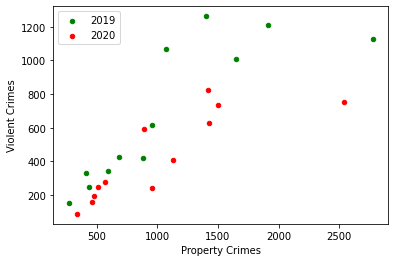

In [2]:
import matplotlib.pyplot as plot

bcd_pcount2 = bcd_complete[pd.DataFrame(bcd_complete['OFFENSE_CODE'].tolist()).isin(p_crimes).any(1).values].dropna(subset=['DISTRICT'])
bcd_pcount2 = bcd_pcount2[bcd_pcount2.DISTRICT != 'External'].groupby(['DISTRICT', 'YEAR'])['INCIDENT_NUMBER'].count()
bcd_vcount2 = bcd_complete[pd.DataFrame(bcd_complete['OFFENSE_CODE'].tolist()).isin(v_crimes).any(1).values].dropna(subset=['DISTRICT'])
bcd_vcount2 = bcd_vcount2[bcd_vcount2.DISTRICT != 'External'].groupby(['DISTRICT', 'YEAR'])['INCIDENT_NUMBER'].count()

freq_pv2 = pd.concat([bcd_pcount2,bcd_vcount2],axis=1)
freq_pv2.columns = ['Property Crimes','Violent Crimes']
crframe = freq_pv2.reset_index()

sc1 = crframe[crframe["YEAR"] == 2019]
sc2 = crframe[crframe["YEAR"] == 2020]

axis = sc1.plot(x="Property Crimes", y="Violent Crimes", kind="scatter", label="2019", c="g")
sc2.plot(x="Property Crimes", y="Violent Crimes", kind="scatter", label="2020", ax=axis, c="r")

plot.show()

## Task 7.3 Indexes our data by district, with violent and property crimes displayed on the y, and with data separated by year, then plots a bar plot

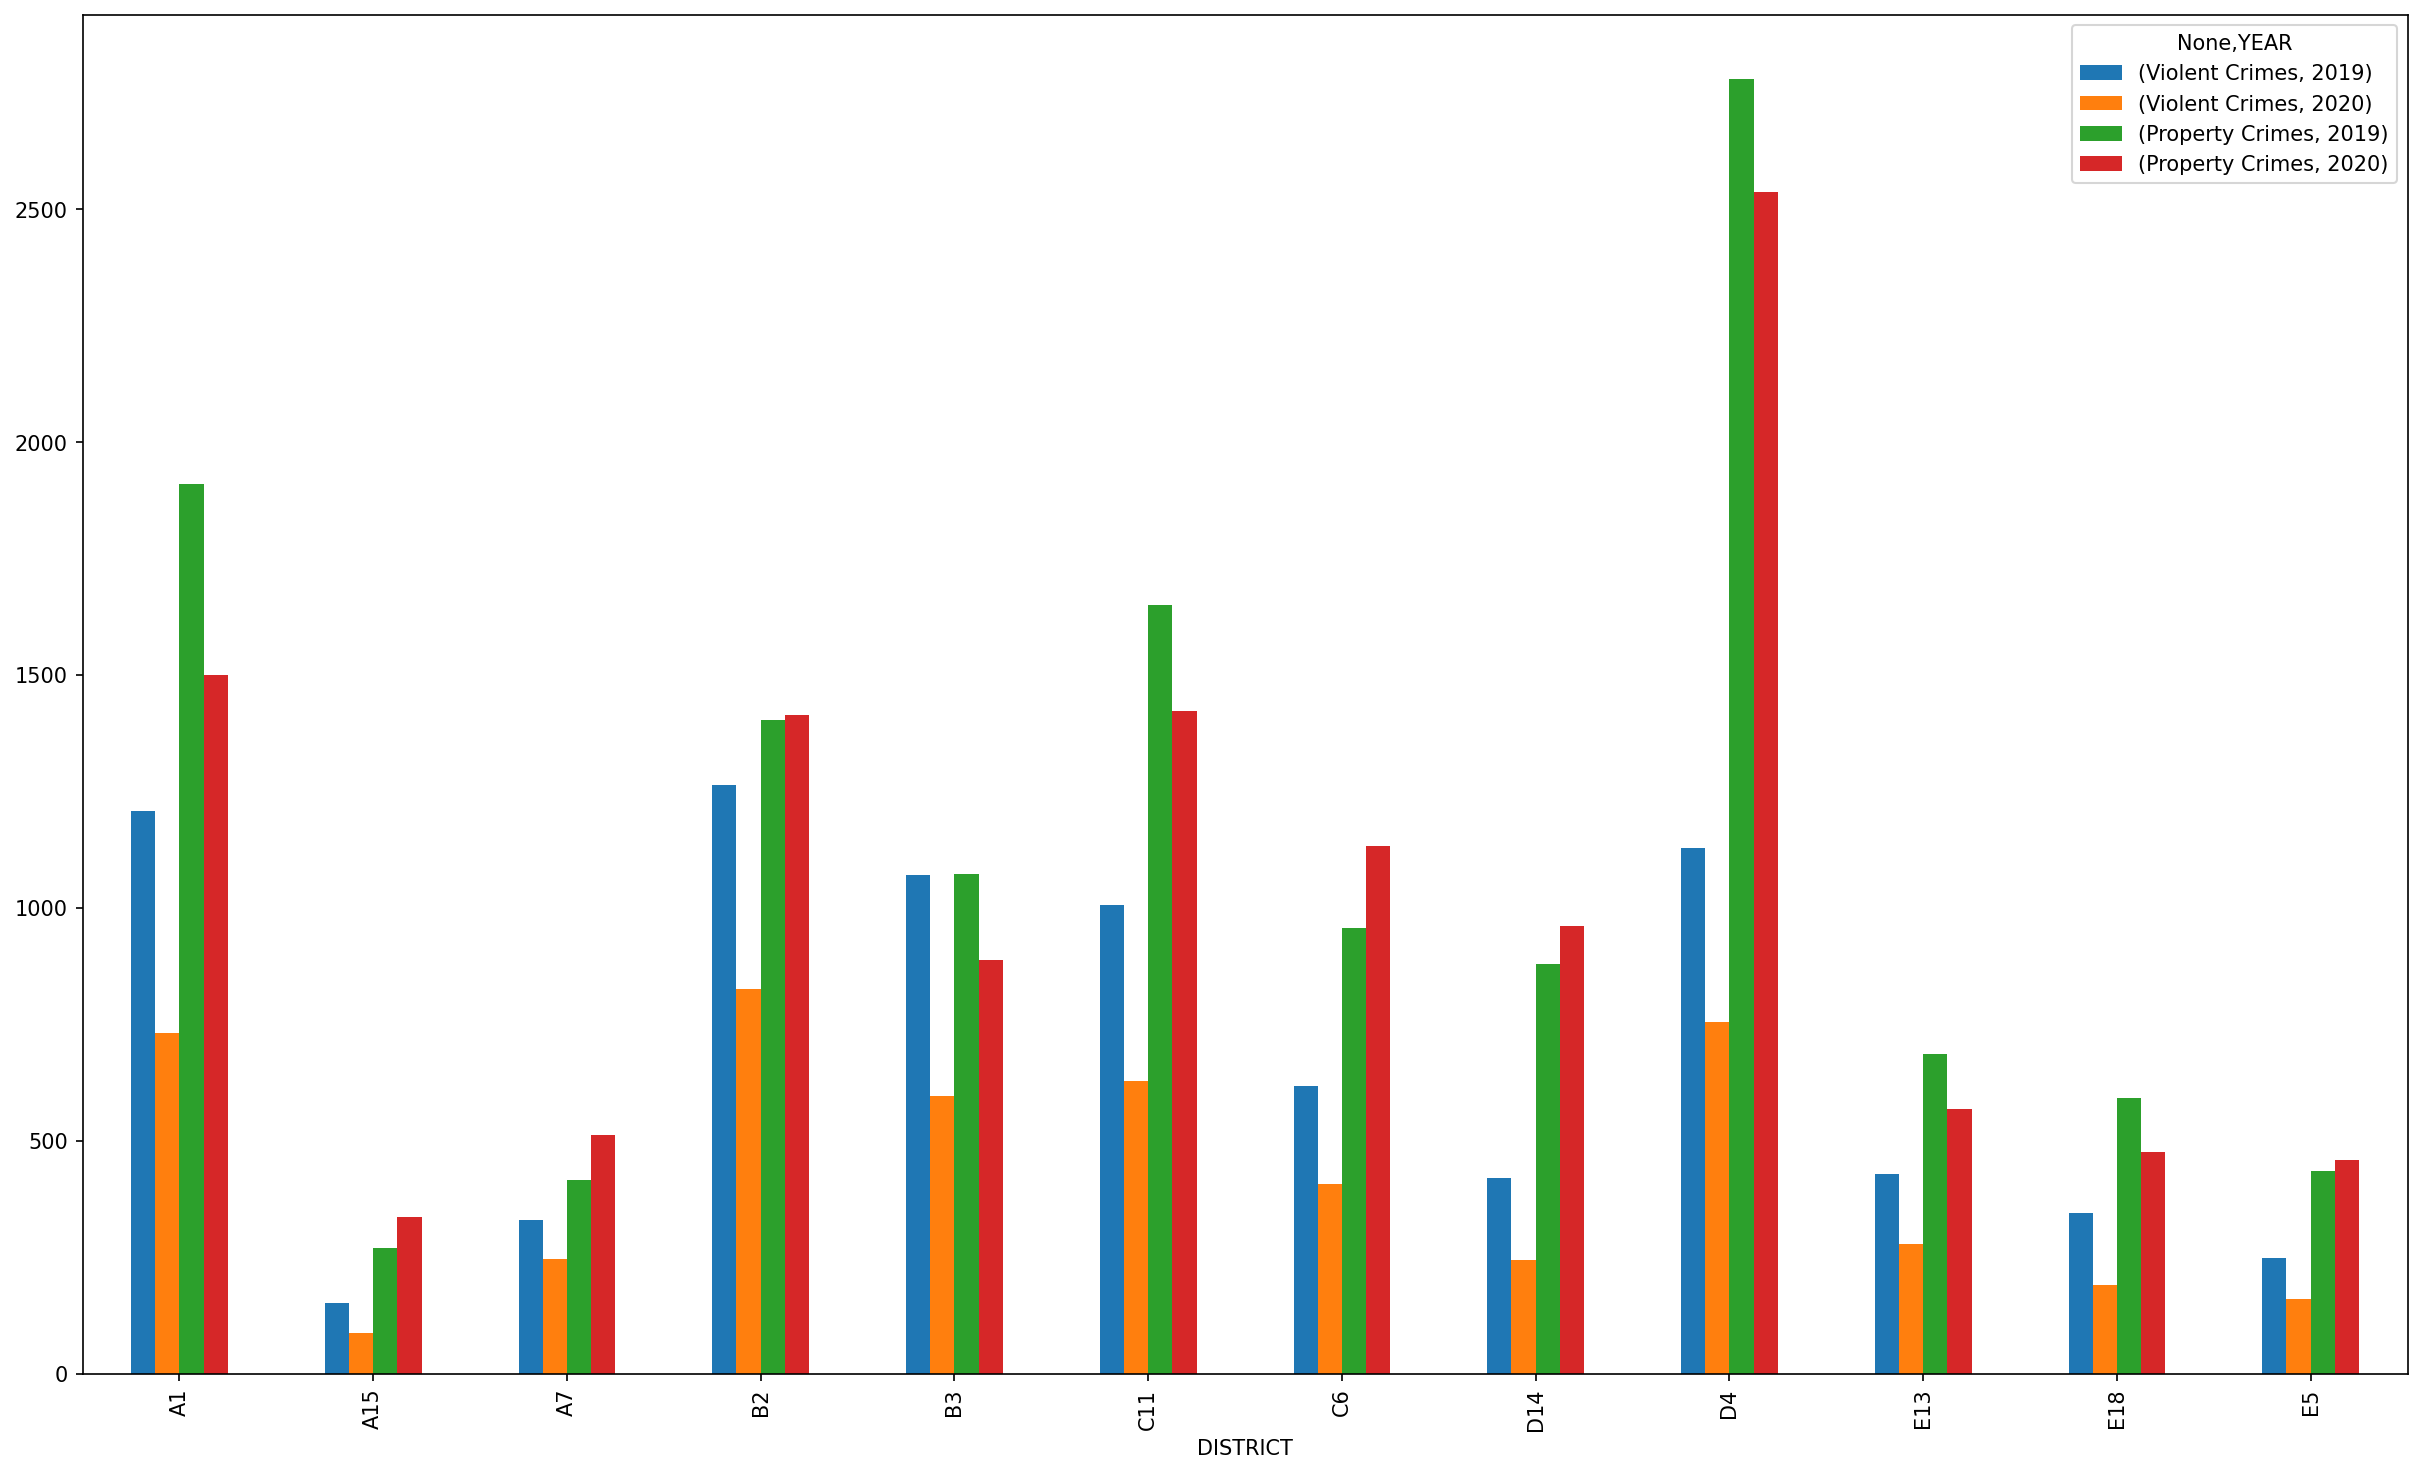

In [3]:
plot.rcParams["figure.figsize"] = (20,12)
plot.rcParams['figure.dpi'] = 150

crframe.pivot(index="DISTRICT", columns="YEAR", values=["Violent Crimes","Property Crimes"]).plot(kind='bar')

plot.show()


## Task 7.4 Reads the initial excel file, parsing the date of occurence variable as datetime. From there, translates occurence date to quarterly date. Then, produces a count of all shooting incidents, grouped by district and quarter. Finally, the quarters vs the total district-level shooting counts are plotted as a violin plot.

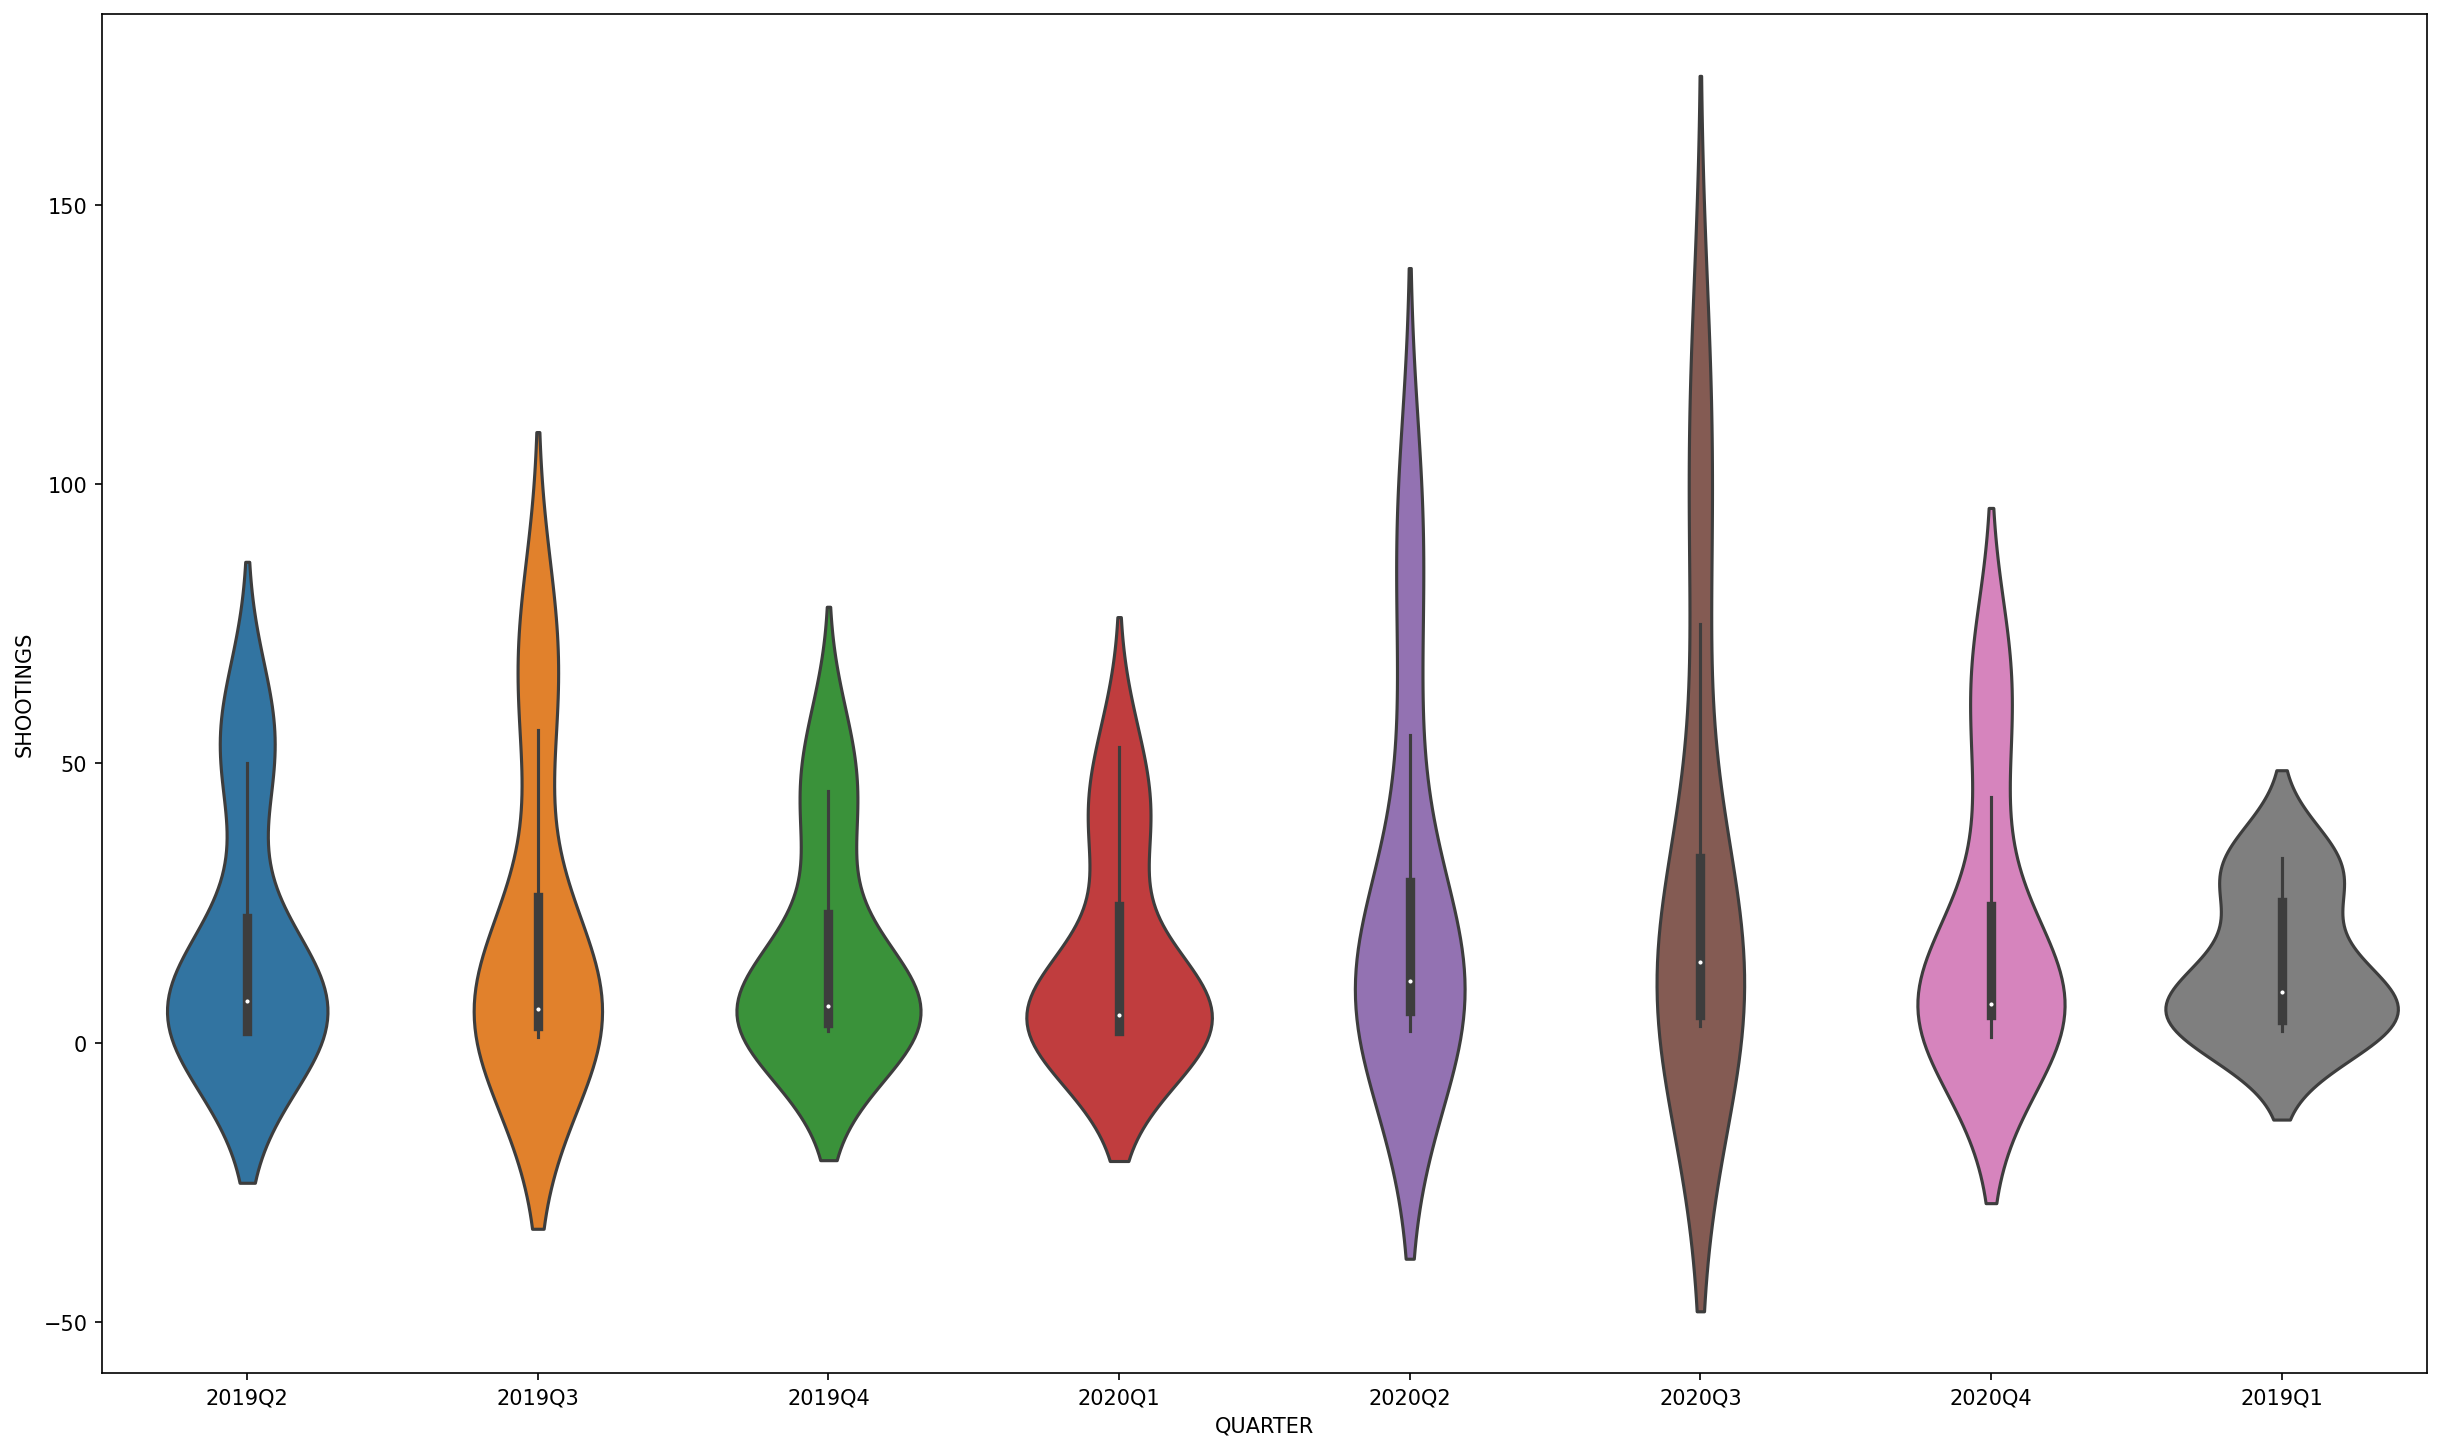

In [4]:
import seaborn as sb

#bcd_complete[bcd_complete["SHOOTING"] == 1]
bcd_complete = pd.read_csv("bcd19-20.csv", low_memory=False, parse_dates=["OCCURRED_ON_DATE"])
bcd_complete["QUARTER"] = bcd_complete["OCCURRED_ON_DATE"].dt.to_period('Q')

bcd_scount = bcd_complete[bcd_complete['SHOOTING'] == 1].dropna(subset=['DISTRICT'])
bcd_scount = bcd_scount[bcd_scount.DISTRICT != 'External'].groupby(['DISTRICT', 'QUARTER'])['INCIDENT_NUMBER'].count()

bcd_sframe = bcd_scount.to_frame().reset_index().rename(columns = {"INCIDENT_NUMBER":"SHOOTINGS"})

sb.violinplot(x="QUARTER", y="SHOOTINGS", data=bcd_sframe)

plot.show()
